

<h1 align="center"><font size="5"> Logistic Regression </font></h1>

Import required libraries:

In [347]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

### Load Data From CSV File  

In [348]:
churn_df = pd.read_csv("combined_data.csv")
churn_df.head()

,Unnamed: 0,published_date,Prediction,sentiment_score,Open
0,0,2017-04-18,65.35911,5.500000,65.330002
1,1,2017-04-19,65.33155,7.000000,65.650002
2,2,2017-04-20,65.31837,10.333333,65.459999
3,3,2017-04-21,65.30778,-0.250000,65.669998
4,4,2017-04-24,65.30923,2.666667,67.480003


Lets select some features for the modeling. Also we change the target data type to be integer, as it is a requirement  by the skitlearn algorithm:

In [349]:
churn_df = churn_df[['Prediction','sentiment_score','Open']]
churn_df['Open'] = churn_df['Open'].astype('int')
churn_df.head()

,Prediction,sentiment_score,Open
0,65.35911,5.500000,65
1,65.33155,7.000000,65
2,65.31837,10.333333,65
3,65.30778,-0.250000,65
4,65.30923,2.666667,67


Lets define X, and y for our dataset:

In [350]:
X = np.asarray(churn_df[['Prediction','sentiment_score']])
X[0:5]

array([[65.36,  5.5 ],
       [65.33,  7.  ],
       [65.32, 10.33],
       [65.31, -0.25],
       [65.31,  2.67]])

In [351]:
y = np.asarray(churn_df['Open'])
y [0:5]

array([65, 65, 65, 65, 67])

Also, we normalize the dataset:

In [352]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.62, -0.06],
       [-1.62,  0.24],
       [-1.63,  0.9 ],
       [-1.63, -1.2 ],
       [-1.63, -0.62]])

## Train/Test dataset

In [353]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (566, 2) (566,)
Test set: (142, 2) (142,)


<h2 id="modeling">Modeling (Logistic Regression)</h2>

In [354]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)


Predict using our test set:

In [355]:
yhat = LR.predict(X_test)
yhat = np.where(yhat <= 130, 1,0)


    

In [356]:
yhat_prob = LR.predict_proba(X_test)


In [357]:
y_test = np.where(y_test <=130, 1,0)


<h2 id="evaluation">Evaluation</h2>

### Jaccard index



In [358]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.9154929577464789

### Confusion matrix
Another way of looking at accuracy of classifier is to look at __confusion matrix__.

In [359]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[88 12]
 [ 0 42]]


Confusion matrix, without normalization
[[88 12]
 [ 0 42]]


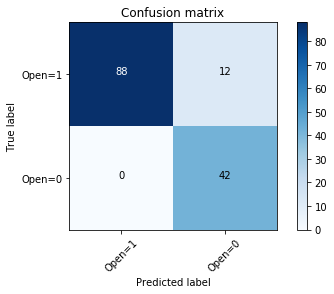

In [360]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Open=1','Open=0'],normalize= False,  title='Confusion matrix')

In [361]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88        42
           1       1.00      0.88      0.94       100

    accuracy                           0.92       142
   macro avg       0.89      0.94      0.91       142
weighted avg       0.93      0.92      0.92       142

